### Lab 6 - South Carolina 

In [21]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [22]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

In [23]:
pip install -U pip setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install --only-binary=:all: "tiktoken>=0.7.0"

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install "jupyter-ai-magics[all]" -q

Note: you may need to restart the kernel to use updated packages.


## Q1 - Population Growth Rate 

## Option a: calculation with sql

Explanation: The graph shows that South Carolina’s population has increased steadily 
throughout the years. The growth rate remains positive in most years, with 
some periods of slightly faster growth, especially in the late 2010s.  

This trend suggests that more people are moving into South Carolina than 
leaving. The consistent growth may be due to the state’s job opportunities, 
moderate cost of living, and warmer climate, which attract new residents 
from other parts of the country.

/tmp/ipykernel_8354/2247454216.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


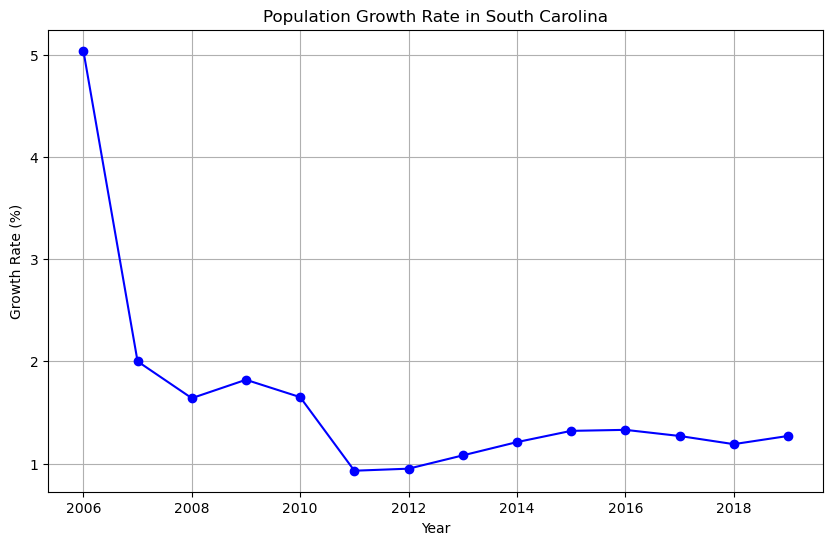

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

query = """
SELECT p.year,
       p.pop,
       ROUND(100.0 * (p.pop - LAG(p.pop) OVER (ORDER BY p.year)) / LAG(p.pop) OVER (ORDER BY p.year), 2) 
       AS growth_rate
FROM population p
JOIN name n ON p.fips = n.fips
WHERE n.name = 'South Carolina'
ORDER BY p.year;
"""

df = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
plt.plot(df['year'], df['growth_rate'], marker='o', color="blue")
plt.title("Population Growth Rate in South Carolina")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.show()



# Q2

/tmp/ipykernel_8354/1894254534.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


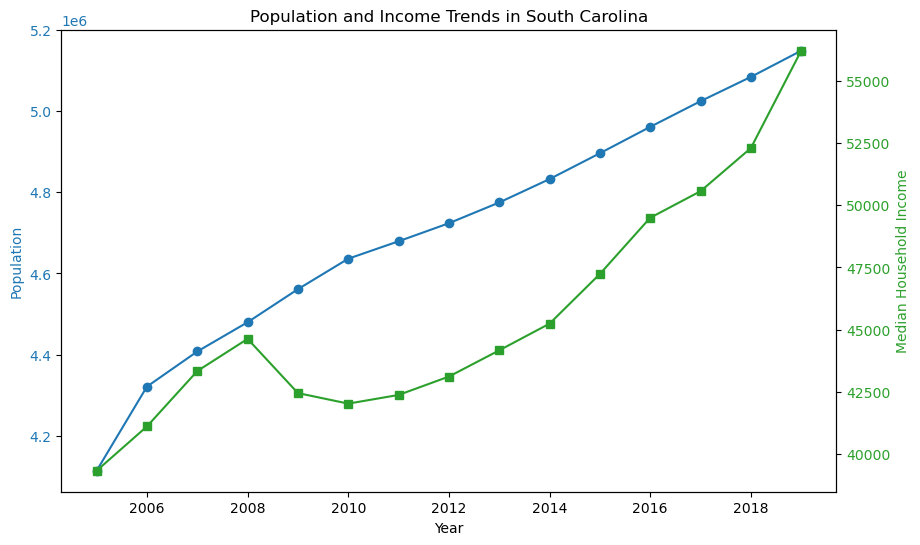

In [27]:
query = """
SELECT i.year, i.income, p.pop
FROM income i
JOIN population p 
  ON i.fips = p.fips AND i.year = p.year
JOIN name n 
  ON i.fips = n.fips
WHERE n.name = 'South Carolina'
ORDER BY i.year;
"""

df = pd.read_sql(query, conn)

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel("Year")
ax1.set_ylabel("Population", color="tab:blue")
ax1.plot(df['year'], df['pop'], color="tab:blue", marker="o")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Median Household Income", color="tab:green")
ax2.plot(df['year'], df['income'], color="tab:green", marker="s")
ax2.tick_params(axis="y", labelcolor="tab:green")

plt.title("Population and Income Trends in South Carolina")
plt.show()


Both population and income show an upward trend in South Carolina. As the 
population continues to grow, median household income also rises over time.  

This pattern suggests that the state’s economy is expanding along with its 
population. The increase in income may be supported by new job opportunities, 
business growth, and migration from higher-cost regions where people seek a 
better cost of living.

### Q3 - How much did the median household income increase each year in South Carolina, and in which year was the biggest jump?

In [20]:
query = """
SELECT 
    i.year,
    i.income,
    i.income - LAG(i.income) OVER (ORDER BY i.year) AS income_change
FROM income i
JOIN name n ON i.fips = n.fips
WHERE n.name = 'South Carolina'
ORDER BY i.year;
"""
df = pd.read_sql(query, conn)


/tmp/ipykernel_8354/75023653.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


This chart shows how much median household income changed from one year to the next in South Carolina. Most years reflect positive income growth, but the amount varies.  

The largest spike occurred in 2008, where income rose sharply compared to the year before. That may reflect a strong job market, minimum wage adjustments, or economic recovery during that period.

Any years showing zero or negative change may be linked to broader economic slowdowns or inflation catching up with earnings.

This analysis gives a more detailed view of how consistently income grows, not just whether it goes up over time.
